In [1]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [2]:
df = pd.read_csv("brc.csv", delimiter=",")



In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [41]:
len(df)

569

In [42]:
df.diagnosis.unique()

array([0, 1], dtype=int64)

In [44]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [43]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis', 'target'],
      dtype='object')

In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

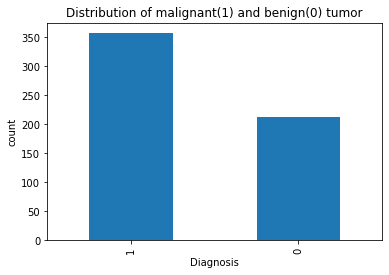

In [7]:
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");

In [8]:
y_target = df['diagnosis']

In [9]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [10]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'})

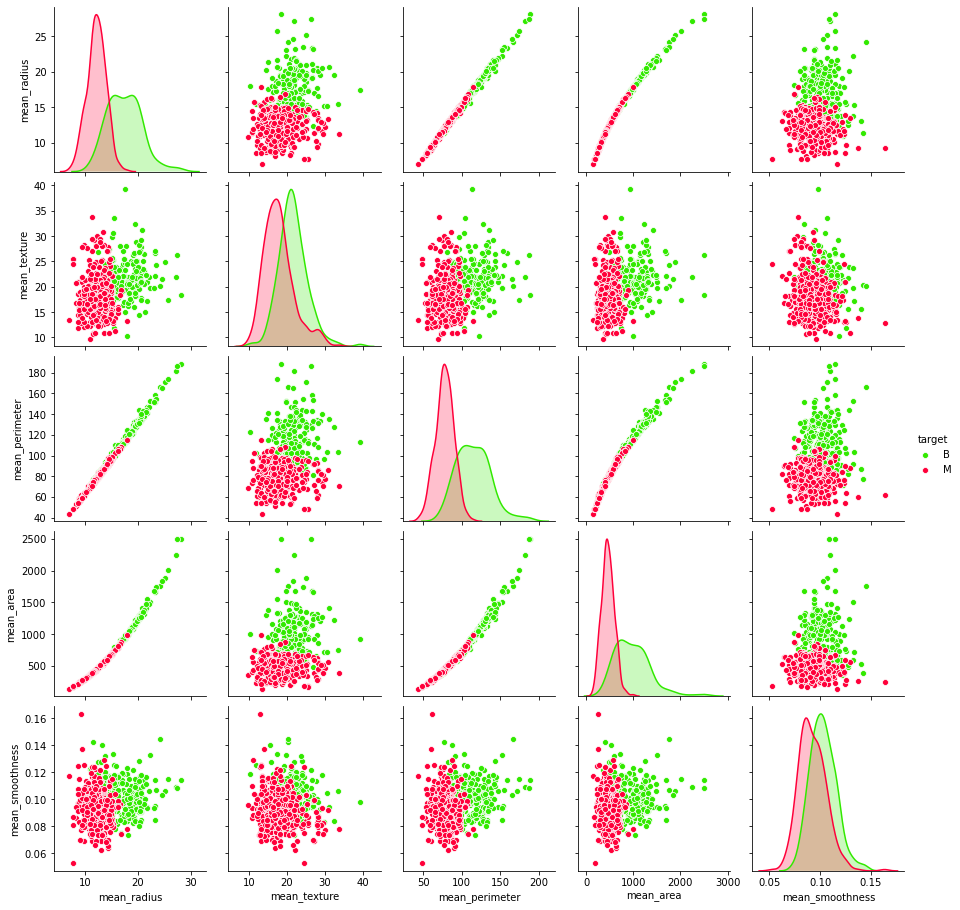

In [11]:
g = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

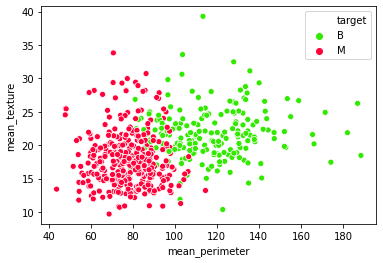

In [12]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target', palette='prism');

In [87]:
features = ['mean_perimeter', 'mean_texture','diagnosis']

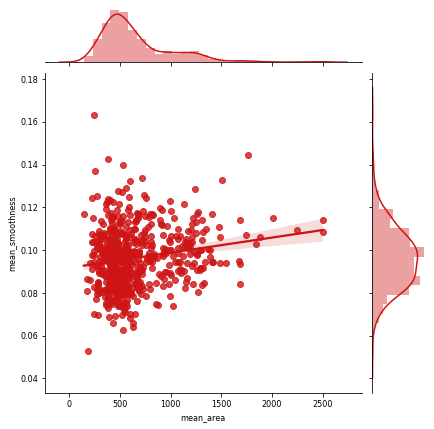

In [72]:
sns.jointplot(x.loc[:,'mean_area'], x.loc[:,'mean_smoothness'], kind="regg", color="#ce1414")

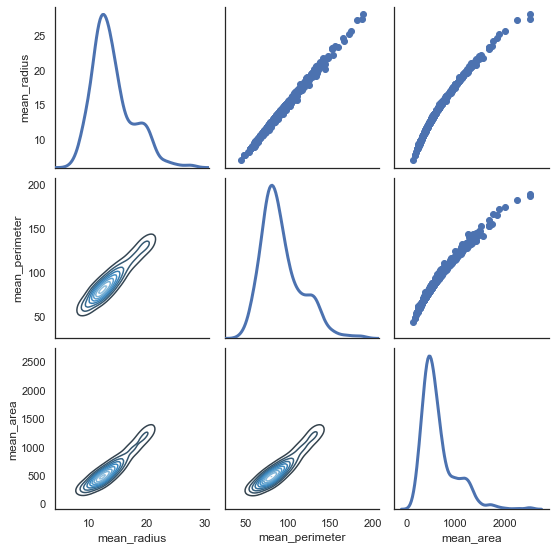

In [89]:
sns.set(style="white")
df = x.loc[:,['mean_radius','mean_perimeter','mean_area']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

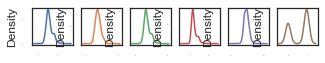

In [94]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()


NameError: name 'mean_radius' is not defined

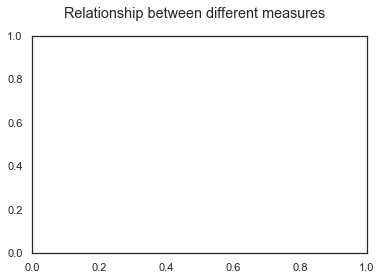

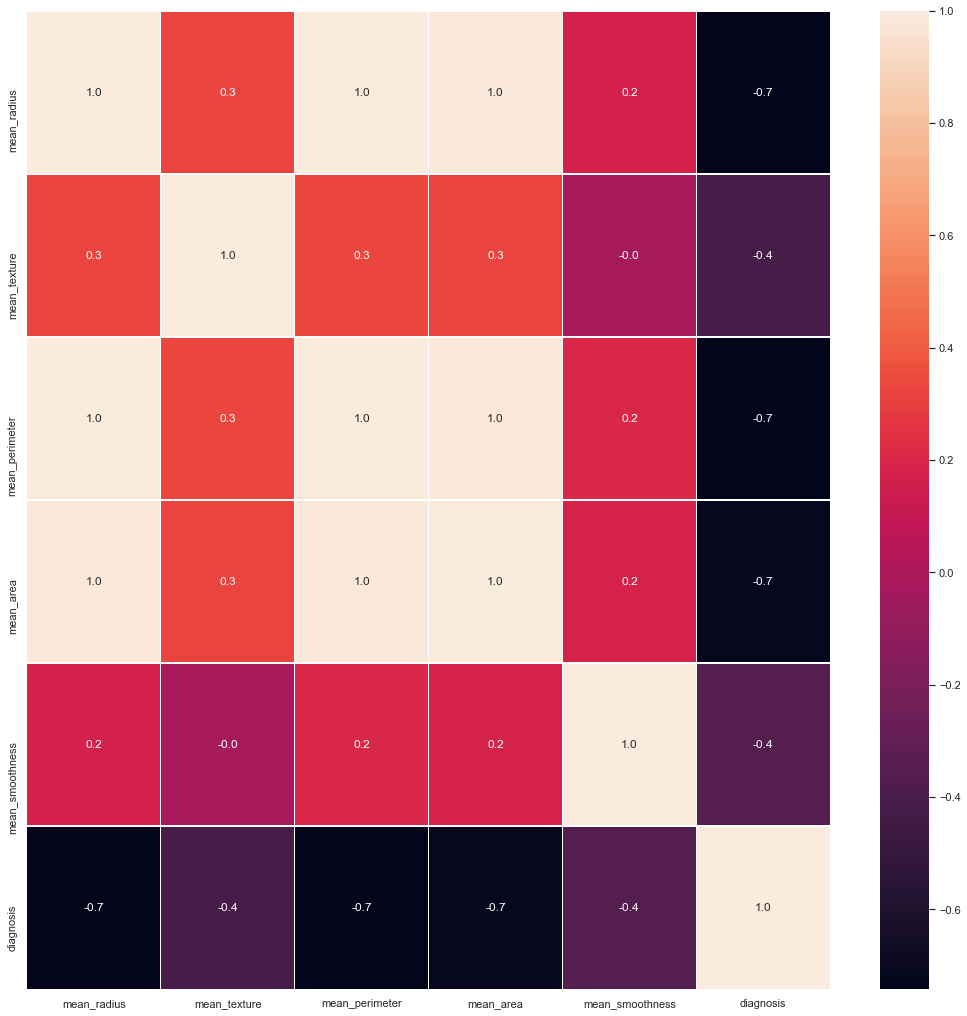

In [74]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [75]:
drop_list1 = ['mean_perimeter','mean_radius']
x_1 = x.drop(drop_list1,axis = 1 )    
x_1.head()

,mean_texture,mean_area,mean_smoothness,diagnosis,target
0,10.38,1001.0,0.11840,0,B
1,17.77,1326.0,0.08474,0,B
2,21.25,1203.0,0.10960,0,B
3,20.38,386.1,0.14250,0,B
4,14.34,1297.0,0.10030,0,B


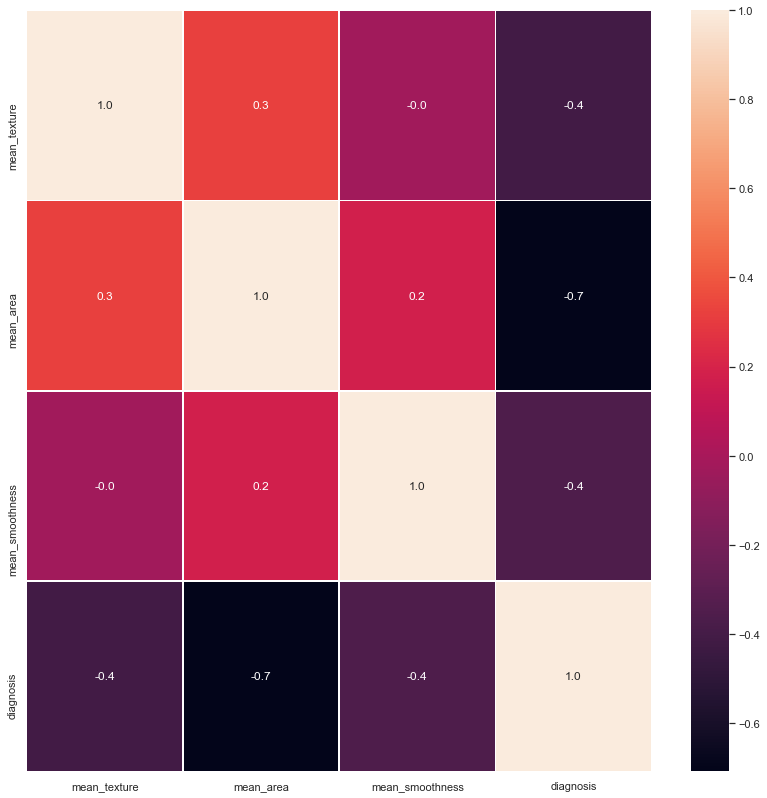

In [76]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [14]:
X_feature = df[features]

In [15]:
# X_feature = df.drop(['target','diagnosis'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
pip install mlxtend

In [25]:
from mlxtend.plotting import plot_decision_regions

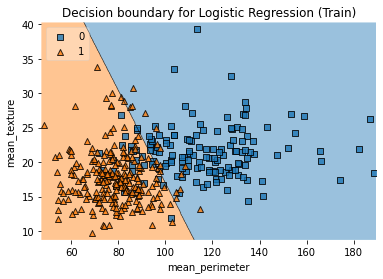

In [26]:
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

In [27]:
y_pred = model.predict(X_test)

In [28]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 91.81286549707602


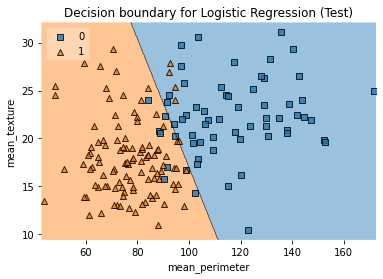

In [29]:
plot_decision_regions(X_test.values, y_test.values, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
conf_mat = confusion_matrix(y_test, y_pred)


In [32]:
conf_mat

array([[ 54,   9],
       [  5, 103]], dtype=int64)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
clf = KNeighborsClassifier()

In [35]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)

Accuracy score using KNN: 92.39766081871345


In [38]:
confusion_matrix(y_test, y_pred)

array([[ 56,   7],
       [  6, 102]], dtype=int64)

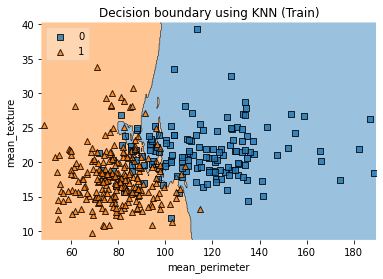

In [39]:
plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

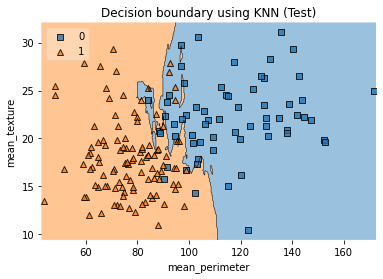

In [40]:
plot_decision_regions(X_test.values, y_test.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

In [50]:
from sklearn.svm import SVC

In [51]:
model_svc = SVC()

In [52]:
model_svc.fit(X_train, y_train)

SVC()

In [53]:
y_predict = model_svc.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
import numpy as np

In [56]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,108,0
is_healthy,12,51


In [57]:
import seaborn as sns

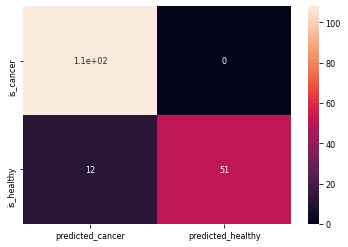

In [58]:
sns.heatmap(confusion, annot=True)

In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        63
           1       0.90      1.00      0.95       108

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171

